<a href="https://colab.research.google.com/github/yoojungsun0/uci-psych203/blob/main/PSYCH203B_A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Go visualize the data. How does resp change as a function of target for sessionID 361?



In [30]:
import pandas as pd
from urllib.request import Request, urlopen
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/PerceptionCognitionLab/data2/master/out/morph1.dat"
url_request  = Request(url)
data = urlopen(url_request )
df = pd.read_table(data, header=0, sep=' ')
df.head(5)

,datID,sessionID,block,trial,background,target,forePeriod,resp,rt
0,1,360,0,0,0,1,32,0,1.262
1,2,360,0,1,0,8,31,0,0.934
2,3,360,0,2,0,9,35,1,0.604
3,4,360,0,3,0,0,31,0,0.617
4,5,360,0,4,0,7,31,0,0.486


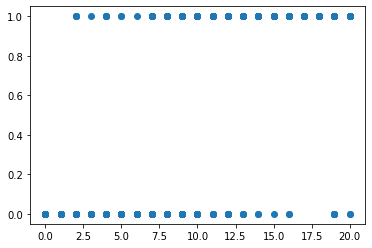

In [44]:
s361 = df.loc[df['sessionID'] == 361]
plt.scatter(s361['target'], s361['resp'], marker='o')

# plt.xlabel('Hour')
# plt.ylabel('Rate')
# plt.legend()
# plt.show()

In [41]:
len(s361['resp'])

504

In [50]:
np.asarray(s361['resp'])

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,

2. Fit a logistic regression model to it. What are the best parameter estimates?

3. How does this regression model account for the data? Visualize it. You should be able to draw the logistic curve at the MLE on top of the data. Then you can inspect the results to look for misfits.

In [65]:
import numpy as np
from scipy import optimize
from scipy.optimize import curve_fit

def make_p(q):
  return 1 / (1+np.exp(-q))

def nll(par, x, dat):
  q = par[0] + par[1]*x
  p = make_p(q)
  llvec = dat*np.log(p) + (1-dat)*np.log(1-p)
  return -np.sum(llvec)

popt, pcov = curve_fit(nll, X,y)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: overflow encountered in exp
  
/usr/local/lib/python3.6/dist-packages/scipy/optimize/minpack.py:808: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


In [66]:
popt

array([-2.5454863 ,  1.01098412])

In [67]:
pcov

array([[inf, inf],
       [inf, inf]])

In [79]:
def new_func(x, alpha, beta):
  q = beta + alpha*x
  p = make_p(q)
  return p

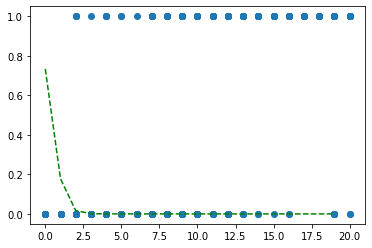

In [82]:
plt.scatter(s361['target'], s361['resp'], marker='o')
# x = s361['target']
x=np.arange(0,20)
plt.plot(x,new_func(x,*popt), 'g--')

In [73]:
make_p(x,*popt)

TypeError: ignored

In [72]:
x

array([ 8,  3, 12, 13,  7, 15, 20,  5, 17,  8, 15,  7,  9,  3, 18,  5, 11,
       16,  6,  6, 11,  1, 13, 13,  0, 15, 20,  1,  9,  2,  9,  1, 19, 18,
       15, 10, 14,  6,  5, 14, 11,  2,  1, 20, 13,  1, 17, 11,  3, 20,  1,
        4, 12,  5, 19, 19, 14,  4,  6, 19,  6,  8,  4,  2, 17,  4, 17, 16,
        7,  7, 18,  9,  7,  8, 18, 12,  9, 19, 14,  5, 12,  9, 20, 20, 12,
        9,  7, 14,  3, 10, 12, 14,  6,  3, 20,  1, 19, 20, 16, 16,  7, 19,
        6, 16,  2, 15, 11, 19, 16, 15,  1, 16,  7, 13, 19,  2, 10, 17,  4,
        8, 17, 11,  2,  6, 19,  6, 13,  9,  5, 20, 10, 20, 10,  0, 16, 17,
        7, 10,  5,  2,  2,  2, 19, 18,  3,  0, 11,  1, 15, 17, 18,  8,  4,
       19, 12,  7, 18,  3,  4,  3, 12,  5,  2,  9, 15,  4,  2, 16, 10, 19,
        2, 15, 11,  2, 15, 15, 13,  4, 18, 17,  8, 19, 10,  2, 12, 15, 20,
       20,  0,  3,  8,  7,  3,  3, 18, 12,  8, 14, 11,  0,  8, 16, 18,  9,
        3, 13,  0, 12, 15, 11, 19, 11, 14,  4,  7,  4, 12,  0, 12, 11,  0,
        1,  3,  0, 18, 11

ValueError: ignored

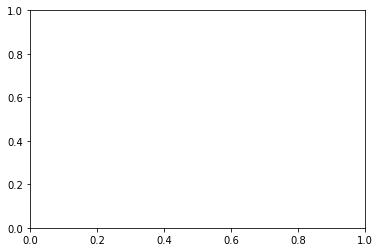

In [70]:
plt.plot(X, nll(x,*popt), 'g--', label='fit: alpha=%5.3f, beta=%5.3f' % tuple(popt))
plt.show()

In [ ]:
sol = optimize.minimize(nll, x0 = [1,1], )

In [62]:
from sklearn.linear_model import LogisticRegression
from scipy.optimize import curve_fit
lr = LogisticRegression(penalty='l2', C=1, random_state=0)
lr.fit(X,y)

lr.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 0,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [52]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1.0, solver='lbfgs', multi_class='ovr')

In [53]:
x = np.asarray(s361['target'])
y = np.asarray(s361['resp'])
X = x.reshape(-1,1)

logreg.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='ovr', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

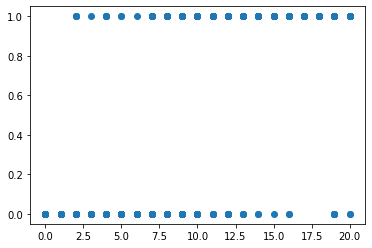

In [54]:
plt.scatter(x,y)

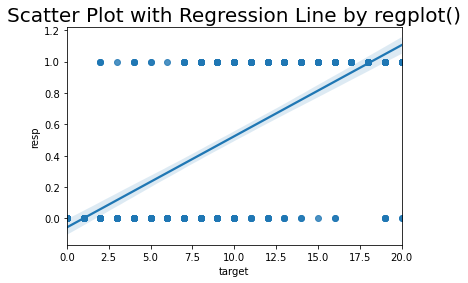

In [46]:

# Scatter Plot with regression line by seaborn regplot()
import seaborn as sns

sns.regplot(x=s361['target'], 

           y=s361['resp'], 

           fit_reg=True) # default

plt.title('Scatter Plot with Regression Line by regplot()', fontsize=20)

plt.show()



# 출처: https://rfriend.tistory.com/413 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

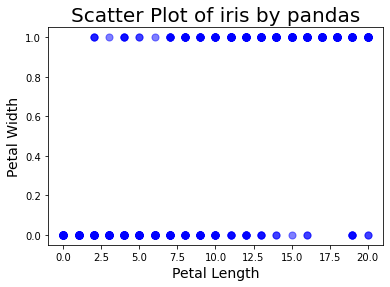

In [48]:
s361.plot.scatter(x='target', 

                  y='resp', 

                  s=50, # marker size

                  c='blue', 

                  alpha=0.5)

plt.title('Scatter Plot of iris by pandas', fontsize=20)

plt.xlabel('Petal Length', fontsize=14)

plt.ylabel('Petal Width', fontsize=14)

plt.show()



# 출처: https://rfriend.tistory.com/413 [R, Python 분석과 프로그래밍의 친구 (by R Friend)]

In [ ]:
#Convert a 1D array to a 2D array in numpy
X = x.reshape(-1,1)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


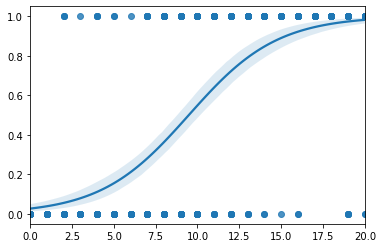

In [56]:
sns.regplot(x=x, 

           y=y, 

           logistic=True) # default